Gerando as imagens da bacia Grande


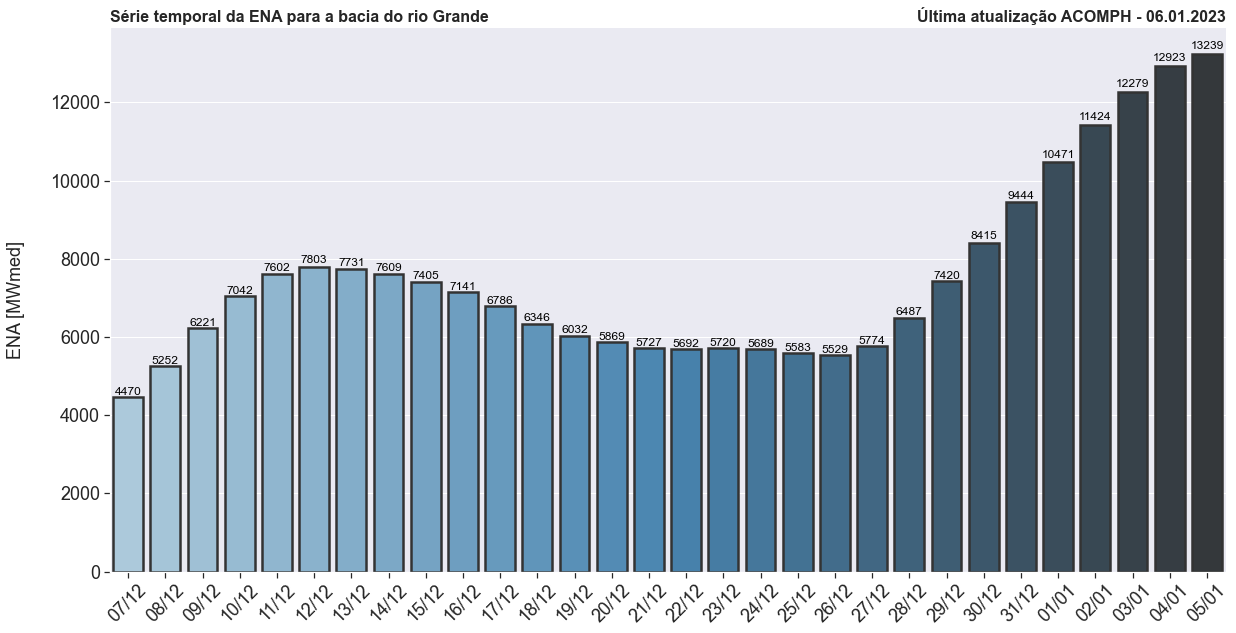

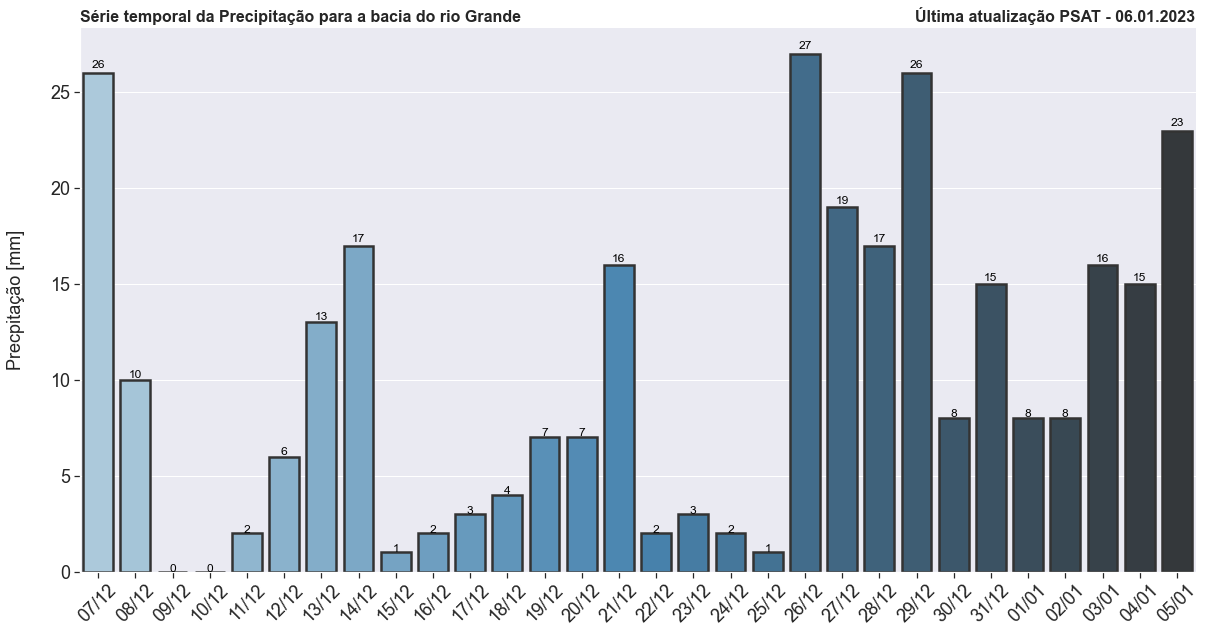

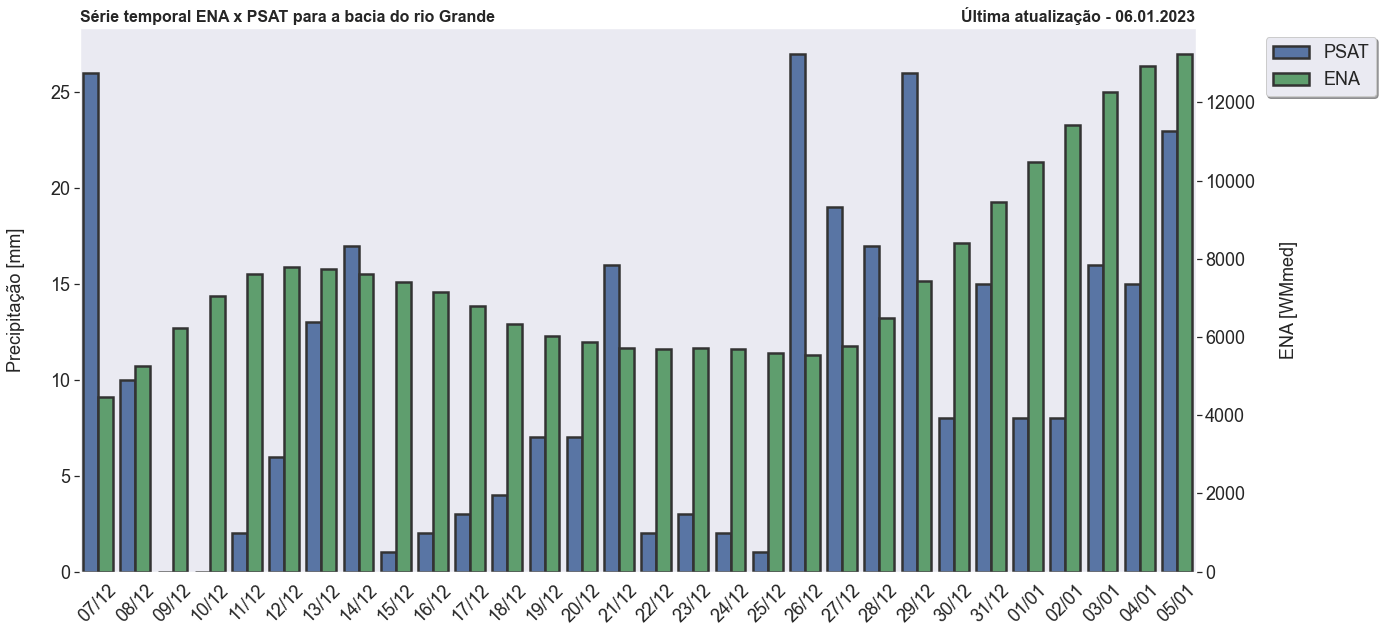

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os 
sns.set(rc={'figure.figsize':(20,15)})

# datas necessárias
now=datetime.now()
dia=now.day
mes=now.month
ano=now.year
# arquivos necessários

file_acomph = f"./acomph/ACOMPH_{str(dia).zfill(2)}.{str(mes).zfill(2)}.{ano}.xls"
file_psat = f"./psat/psat_{str(dia).zfill(2)}{str(mes).zfill(2)}{ano}.txt"
prods = './prods/prod.xls'

###############################################################################################################

# Function to put values on top/middle of the bar graphs
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2 
                if p.get_y() < 1:
                    space = 0
                _y = p.get_y() + (p.get_height() + (p.get_height()*0.01)) + float(space)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center", size='large', color='black') 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

def calcula_ena(posto, file):
    
    if posto in grande:
        
        nome_da_bacia = 'Grande'
        
    if posto in paranaiba:
        
        nome_da_bacia = 'Paranaíba'
        
    if posto in paranapanema:
        
        nome_da_bacia = 'Paranapanema'

    if posto in parana:
        
        nome_da_bacia = 'Paraná'
        
    if posto in iguacu:
        
        nome_da_bacia = 'Iguaçu'
        
    if posto in saofrancisco:
        
        nome_da_bacia = 'São Francisco'
    
    if posto in tocantins:
        
        nome_da_bacia = 'Tocantins'
        
    if posto in uruguai:
        
        nome_da_bacia = 'Uruguai'
        
    vazao = pd.read_excel(file, sheet_name=nome_da_bacia)
    v = vazao[posto][4:34]
    datas = vazao['Unnamed: 0'][4:34]
    
    if posto in prods_def_sudeste1.index: 
    
        ena = prods_def_sudeste1.at[posto,'prod'] * v
        nome_posto = prods_def_sudeste1.at[posto,'sub-bacia']

    if posto in prods_def_sudeste2.index: 
    
        ena = prods_def_sudeste2.at[posto,'prod'] * v
        nome_posto = prods_def_sudeste2.at[posto,'sub-bacia']
        
    if posto in prods_def_sul_nordeste_norte.index: 
    
        ena = prods_def_sul_nordeste_norte.at[posto,'prod'] * v
        nome_posto = prods_def_sul_nordeste_norte.at[posto,'sub-bacia']
        
    ena = pd.DataFrame(ena.values)
    formato = "%d%m%Y"
    ena.index = datas
    datas_nova = ena.index.strftime(formato)
    ena.index = datas_nova
    ena.reset_index(inplace=True)
    ena.columns = ['Data', nome_posto + ' [MWmed]']
    ena.set_index('Data', inplace=True)
    
    return ena

def calcula_ena_media(nome, file):

    valor = calcula_ena(nome[0], file)
    
    for bacia in nome[1:]:
        valor2 = calcula_ena(bacia, file)
        valor = pd.concat([valor, valor2], axis = 1)
    
    valor['Soma [MWmed]'] = valor.sum(axis=1)
    return valor

##########################################################################################################################

if os.path.exists(file_acomph) == True and os.path.exists(file_psat) == True and os.path.exists(prods) == True:

    # Ajustando parametros do tamanho das figuras
    #plt.rcParams["figure.figsize"] = (20,10)

    # Abriando o arquivo das produtibilidades 
    prods = pd.read_excel(prods, sheet_name='Tab-24', header=None)
    prods_def = prods[4:56][[0,1,2,4,5,6,8,9,10]]

    # Sudeste 
    prods_def_sudeste1 = prods_def[[0,1,2]]
    prods_def_sudeste1.columns = ['codigo','sub-bacia','prod']
    prods_def_sudeste1.reset_index(inplace=True)
    prods_def_sudeste1 = prods_def_sudeste1[['codigo','sub-bacia','prod']]
    prods_def_sudeste1.set_index('codigo', inplace=True)

    # Sudeste 
    prods_def_sudeste2 = prods_def[[4,5,6]]
    prods_def_sudeste2.columns = ['codigo','sub-bacia','prod']
    prods_def_sudeste2.reset_index(inplace=True)
    prods_def_sudeste2 = prods_def_sudeste2[['codigo','sub-bacia','prod']]
    prods_def_sudeste2.set_index('codigo', inplace=True)

    # Sudeste / Sul / Norte / Nordeste
    prods_def_sul_nordeste_norte = prods_def[[8,9,10]]
    prods_def_sul_nordeste_norte.columns = ['codigo','sub-bacia','prod']
    prods_def_sul_nordeste_norte.reset_index(inplace=True)
    prods_def_sul_nordeste_norte = prods_def_sul_nordeste_norte[['codigo','sub-bacia','prod']]
    prods_def_sul_nordeste_norte.set_index('codigo', inplace=True)

    # Separando os postos das bacias (sub-bacias) em listas
    grande = [1, 211, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18]
    paranaiba = [22, 251, 24, 25, 206, 207, 28, 205, 23, 209, 31, 32, 33, 99, 247, 248, 261, 294, 241]
    paranapanema = [47, 48, 49, 249, 50, 51, 52, 57, 61, 62, 63]
    parana = [34, 245, 154, 246, 266]
    iguacu = [74, 76, 71, 72, 73, 77, 78, 222, 81]
    uruguai = [215, 88, 89, 216, 217, 92, 93, 220, 94, 286, 102, 103]
    saofrancisco = [155, 156, 158, 169, 172, 178]
    tocantins = [270, 191, 253, 257, 273, 271, 275] 

    #bacias = [grande, paranaiba, paranapanema, parana, tocantins, iguacu, uruguai, saofrancisco]
    bacias = [grande]

    for bacia in bacias: 
        
        bacia_ena = calcula_ena_media(bacia, file_acomph)

        # Lendo os arquivos do PSAT 

        values_grande = []
        values_iguacu = []
        values_parana = []
        values_paranapanema = []
        values_paranaiba = []
        values_tocantins = []
        values_saofrancisco = []
        values_uruguai = []

        # lendo os arquivos

        for dias in bacia_ena.index:

            filename = './psat/psat_' + dias + '.txt'

            df = pd.read_table(filename, delim_whitespace=True, header=None)

            # colocando em um df

            df.columns=['NAME','LAT','LON','PREC']

            # separando em bacias

            sub_bacias_grande = ['PSATAGV' , 'PSATCMG', 'PSATCES', 'PSATELC', 'PSATFUN', 'PSATFUR', 'PSATMRB', 'PSATPRG', 'PSATPAS','PSATPTB', 'PSATPTC']

            sub_bacias_iguacu = ['PSATFZA', 'PSATJSG', 'PSATSCX', 'PSATSCL', 'PSATUVT']

            sub_bacias_parana = ['PSATBSM', 'PSATFLE', 'PSATITP', 'PSATIVM', 'PSATPTQ','PSATISOT', 'PSATJUP', 'PSATSDG', 'PSATFZBT', 'PSATPPRA'] 

            sub_bacias_paranaiba = ['PSATESP', 'PSATSRC', 'PSATFRCL','PSATCBI', 'PSATCBIV', 'PSATEMB', 'PSATIMBR', 'PSATNPTE', 'PSATARV', 'PSATSFC', 'PSATSSM']

            sub_bacias_paranapanema = ['PSATCNI', 'PSATCPV', 'PSATCHT', 'PSATJUR', 'PSATMAU', 'PSATROS']

            sub_bacias_saofrancisco = ['PSATQMD', 'PSATRBX', 'PSATSFR', 'PSATSRM', 'PSATTMR', 'PSATBOQ']

            sub_bacias_tocantins = ['PSATSME', 'PSATBTE', 'PSATARAG', 'PSATLAJ', 'PSATPTRL', 'PSATLJET', 'PSATUCR']

            sub_bacias_uruguai = ['PSATBGR', 'PSATCNV', 'PSATFCH', 'PSATITA', 'PSATMCD', 'PSATMOJ', 'PSATQQX', 'PSATPSJ']

            df.set_index('NAME', inplace=True)

            grande_vals = np.round(df.loc[sub_bacias_grande]['PREC'].mean(), 0)
            iguacu_vals = np.round(df.loc[sub_bacias_iguacu]['PREC'].mean(), 0)
            parana_vals = np.round(df.loc[sub_bacias_parana]['PREC'].mean(), 0)
            paranaiba_vals = np.round(df.loc[sub_bacias_paranaiba]['PREC'].mean(), 0)
            paranapanema_vals = np.round(df.loc[sub_bacias_paranapanema]['PREC'].mean(), 0)
            saofrancisco_vals = np.round(df.loc[sub_bacias_saofrancisco]['PREC'].mean(), 0)
            tocantins_vals = np.round(df.loc[sub_bacias_tocantins]['PREC'].mean(), 0)
            uruguai_vals = np.round(df.loc[sub_bacias_uruguai]['PREC'].mean(), 0)

            values_grande.append(grande_vals)
            values_iguacu.append(iguacu_vals)
            values_parana.append(parana_vals)
            values_paranapanema.append(paranapanema_vals)
            values_paranaiba.append(paranaiba_vals)
            values_tocantins.append(tocantins_vals)
            values_saofrancisco.append(saofrancisco_vals)
            values_uruguai.append(uruguai_vals)

        chuva_grande = np.sum(values_grande)
        chuva_iguacu = np.sum(values_iguacu)
        chuva_parana = np.sum(values_parana)
        chuva_paranapanema = np.sum(values_paranapanema)
        chuva_paranaiba = np.sum(values_paranaiba)
        chuva_tocantins = np.sum(values_tocantins)
        chuva_saofrancisco = np.sum(values_saofrancisco)
        chuva_uruguai = np.sum(values_uruguai)

        if bacia == grande: 

            valores = values_grande
            nome_da_bacia = 'Grande'
            path_dest='./grande'

        if bacia == parana:

            valores = values_parana
            nome_da_bacia = 'Paraná'
            path_dest='./parana'

        if bacia == paranapanema:

            valores = values_paranapanema
            nome_da_bacia = 'Paranapanema'
            path_dest='./paranapanema'

        if bacia == paranaiba:

            valores = values_paranaiba
            nome_da_bacia = 'Paranaíba'
            path_dest='./paranaiba'

        if bacia == uruguai:

            valores = values_uruguai
            nome_da_bacia = 'Uruguai'
            path_dest='./uruguai'

        if bacia == saofrancisco:

            valores = values_saofrancisco
            nome_da_bacia = 'São Francisco'
            path_dest='./saofrancisco'

        if bacia == iguacu:

            valores = values_iguacu
            nome_da_bacia = 'Iguaçu'
            path_dest='./iguacu'

        if bacia == tocantins:

            valores = values_tocantins
            nome_da_bacia = 'Tocantins'
            path_dest='./tocantins'

        bacia_ena['PSAT'] = valores
        
        print (f"Gerando as imagens da bacia {nome_da_bacia}")
        
        if os.path.exists(file_acomph) == True:
        
            plt.figure(figsize=((20,10)))

            formato = "%d/%m"
            bacia_ena.index = pd.to_datetime(bacia_ena.index, format='%d%m%Y').strftime(formato)

            ax = sns.barplot(x=bacia_ena.index, y='Soma [MWmed]', data = bacia_ena, palette='Blues_d', linewidth=2.5, edgecolor=".2")
            show_values(ax)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.get_xaxis().tick_bottom()
            ax.get_yaxis().tick_left()
            plt.xticks(rotation=90)
            plt.title(f'Série temporal da ENA para a bacia do rio {nome_da_bacia}', loc='left', fontsize = 16, fontweight="bold")
            plt.title(f'Última atualização ACOMPH - {file_acomph[16:26]}', loc='right', fontsize = 16, fontweight="bold")
            plt.yticks(fontsize=18)
            plt.xticks(fontsize=18)
            plt.ylabel('ENA [MWmed]\n', fontsize = 18)
            ax.set(xlabel=None)

            for item in ax.get_xticklabels():
                item.set_rotation(45)

            os.makedirs(path_dest, exist_ok=True)
            plt.savefig(f'{path_dest}/ENA.png', bbox_inches='tight')
            #plt.close()
            
        if os.path.exists(file_psat) == True:
        
            plt.figure(figsize=((20,10)))

            ax1 = sns.barplot(x=bacia_ena.index, y='PSAT', data = bacia_ena, palette='Blues_d', linewidth=2.5, edgecolor=".2")
            show_values(ax1)
            ax1.spines['top'].set_visible(False)
            ax1.spines['right'].set_visible(False)
            ax1.get_xaxis().tick_bottom()
            ax1.get_yaxis().tick_left()
            plt.xticks(rotation=90)
            plt.title(f'Série temporal da Precipitação para a bacia do rio {nome_da_bacia}', loc='left', fontsize = 16, fontweight="bold")
            plt.title(f'Última atualização PSAT - {file_acomph[16:26]}', loc='right', fontsize = 16, fontweight="bold")
            plt.yticks(fontsize=18)
            plt.xticks(fontsize=18)
            plt.ylabel('Precpitação [mm]\n', fontsize = 18)
            ax1.set(xlabel=None)

            for item in ax1.get_xticklabels():
                item.set_rotation(45)

            os.makedirs(path_dest, exist_ok=True)
            plt.savefig(f'{path_dest}/PSAT.png', bbox_inches='tight')
            #plt.close()
            
        if os.path.exists(file_acomph) == True and os.path.exists(file_psat) == True:
        
            fig = plt.figure(figsize=((20,10)))
            ax = sns.barplot(x=bacia_ena.index, y='PSAT', data=bacia_ena, color='b', linewidth=2.5, edgecolor=".2", label = 'PSAT')
            width_scale = 0.5
            for bar in ax.containers[0]:
                bar.set_width(bar.get_width() * width_scale)
            ax2 = ax.twinx()
            sns.barplot(x=bacia_ena.index, y='Soma [MWmed]', data=bacia_ena, ax=ax2, color='g', linewidth=2.5, edgecolor=".2", label='ENA')
            for bar in ax2.containers[0]:
                x = bar.get_x()
                w = bar.get_width()
                bar.set_x(x + w * (1- width_scale))
                bar.set_width(w * width_scale)
            for item in ax.get_xticklabels():
                item.set_rotation(45)

            ax.set(xlabel=None)
            ax2.set(xlabel=None)
            ax.xaxis.set_tick_params(labelsize=18)
            ax.yaxis.set_tick_params(labelsize=18)
            ax2.yaxis.set_tick_params(labelsize=18)
            ax.set_ylabel('Precipitação [mm]\n', fontsize=18)
            ax2.set_ylabel('\nENA [WMmed]', fontsize=18)
            ax.grid(False)
            ax2.grid(False)
            plt.title(f'Série temporal ENA x PSAT para a bacia do rio {nome_da_bacia}', loc='left', fontsize = 16, fontweight="bold")
            plt.title(f'Última atualização - {file_acomph[16:26]}', loc='right', fontsize = 16, fontweight="bold")
            fig.legend(bbox_to_anchor=(1.17,1), bbox_transform=ax.transAxes, fancybox=True, shadow=True, fontsize=18)
            os.makedirs(path_dest, exist_ok=True)
            plt.savefig(f'{path_dest}/PSAT x ENA.png', bbox_inches='tight')
            #plt.close()
            
else:
    
    print ("Faltam arquivos ... ")
    

In [4]:
bacia_ena.index

Index(['07/12', '08/12', '09/12', '10/12', '11/12', '12/12', '13/12', '14/12',
       '15/12', '16/12', '17/12', '18/12', '19/12', '20/12', '21/12', '22/12',
       '23/12', '24/12', '25/12', '26/12', '27/12', '28/12', '29/12', '30/12',
       '31/12', '01/01', '02/01', '03/01', '04/01', '05/01'],
      dtype='object', name='Data')

In [7]:
values_grande

[26.0,
 10.0,
 0.0,
 0.0,
 2.0,
 6.0,
 13.0,
 17.0,
 1.0,
 2.0,
 3.0,
 4.0,
 7.0,
 7.0,
 16.0,
 2.0,
 3.0,
 2.0,
 1.0,
 27.0,
 19.0,
 17.0,
 26.0,
 8.0,
 15.0,
 8.0,
 8.0,
 16.0,
 15.0,
 23.0]

In [5]:
bacia_ena

,CAMARGOS [MWmed],FUNIL-GRANDE [MWmed],FURNAS [MWmed],MASC. DE MORAES [MWmed],ESTREITO [MWmed],JAGUARA [MWmed],IGARAPAVA [MWmed],VOLTA GRANDE [MWmed],P COLOMBIA [MWmed],CACONDE [MWmed],EUC DA CUNHA [MWmed],LIMOEIRO [MWmed],MARIMBONDO [MWmed],AGUA VERMELHA [MWmed],Soma [MWmed],PSAT
Data,,,,,,,,,,,,,,,,
07/12,42.807546,133.298576,846.65229,304.89585,470.197416,336.467921,122.135595,213.315714,192.596879,106.487037,168.902202,49.94277,710.255546,771.762246,4469.717588,26.0
08/12,54.823864,166.714965,1157.417606,398.431151,592.735397,414.862586,144.300597,241.432222,213.846485,105.911115,157.200487,47.41347,776.595417,780.682513,5252.367875,10.0
09/12,61.630117,207.645397,1399.82807,532.851841,785.683445,544.507487,184.50647,296.030579,253.091289,80.95702,131.295413,40.193959,882.073937,820.301961,6220.596984,0.0
10/12,58.966794,207.481777,1493.515136,629.248738,952.443012,668.949612,230.609686,367.85554,301.626475,62.51218,101.007563,31.303096,1036.165675,900.639844,7042.325128,0.0
11/12,51.599012,179.645664,1525.120033,663.618638,1032.98307,739.912404,264.42146,434.183857,352.641304,52.943134,82.797036,25.415958,1170.960557,1026.021869,7602.263995,2.0
12/12,39.972981,161.194639,1389.243989,675.133463,1061.823532,768.754973,281.615498,478.214284,394.924846,43.893871,69.151782,21.169745,1275.753971,1142.488361,7803.335934,6.0
13/12,34.750422,142.089109,1259.440216,622.931304,1011.22455,744.674266,281.519882,495.314793,421.322745,42.624431,63.737357,19.248576,1347.5746,1244.116335,7730.568585,13.0
14/12,33.595654,135.437844,1157.255264,580.261435,944.461748,700.017198,269.636399,490.423503,433.207194,51.68918,72.475996,21.339378,1391.630914,1327.697623,7609.129329,17.0
15/12,32.949087,127.514431,1086.909653,541.026754,882.817658,654.942087,253.543151,468.181125,428.385827,47.133123,71.911016,21.512958,1426.416657,1361.30467,7404.548198,1.0
